In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [6]:
X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [7]:
X

array([[ 1.06996503,  1.22477405],
       [-0.30999136, -0.00882361],
       [ 0.07570147, -1.67400674],
       ...,
       [-0.63749473, -0.58840908],
       [-1.21166988, -1.75938057],
       [ 0.41237439, -0.97552489]])

In [8]:
y

array([ 1.68403670e+02, -2.59693187e+01, -9.63949142e+01,  1.07182059e+02,
       -1.87539518e+02,  8.96401853e+01,  7.11731919e+01,  8.39297856e+01,
        5.01664565e+01, -2.45477629e+01,  2.52485286e+02,  8.62672079e+01,
       -3.12827080e+00,  6.34818482e+01, -8.91730388e+01,  1.60984532e+02,
        1.74767396e+02,  2.58950004e+02, -1.26805085e+02,  1.60127800e+02,
       -1.75833098e+02, -2.12710556e+02,  3.29670392e+01, -5.79595997e+00,
        6.77456858e+01, -3.78475486e+01,  1.09185684e+02,  4.92151152e+01,
        1.81236502e+02,  6.63495455e-01,  8.79887231e+01, -9.53874760e+01,
       -4.91494104e+01, -2.05628933e+02,  1.03251306e+02, -1.76286521e+01,
       -5.94277569e+01, -1.73368564e+02,  1.39686280e+02,  1.32357398e+01,
        1.36833848e+01,  1.49937105e+02, -1.29928753e+02, -2.34798601e+02,
       -7.44162060e+01, -9.86162980e+01,  6.15879592e+01,  1.27395727e+01,
        2.67984182e+01, -1.41382005e+02,  1.87944140e+02, -6.22813957e+01,
       -1.92525311e+02,  

In [10]:
pd.DataFrame(X)

,0,1
0,1.069965,1.224774
1,-0.309991,-0.008824
2,0.075701,-1.674007
3,0.757295,0.651828
4,-0.602338,-2.159589
...,...,...
995,0.833293,-0.684973
996,0.450444,0.785094
997,-0.637495,-0.588409
998,-1.211670,-1.759381


<Axes: xlabel='0', ylabel='1'>

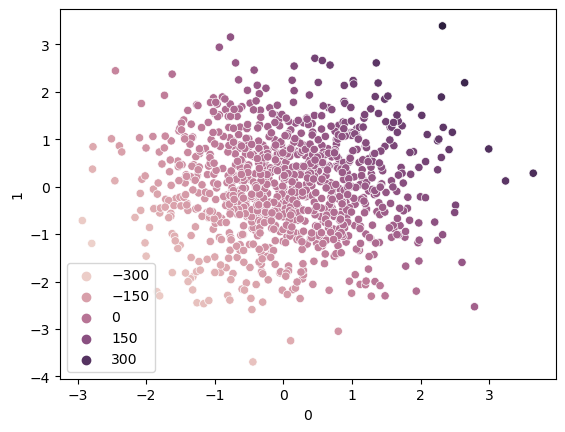

In [11]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [12]:
from sklearn.svm import SVR

In [13]:
svr = SVR(kernel='linear')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=17)

In [15]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [16]:
svr.coef_

array([[84.66227506, 63.19555318]])

In [17]:
y_pred = svr.predict(X_test)
y_pred

array([  41.21403262,  -79.56365577, -110.21474737,   -0.32122933,
         12.65995645, -136.85611899,  118.76090167,   86.03451036,
        188.79462489,   50.93448593, -235.8954246 ,   71.49761507,
        -21.33633386,  -90.11626706, -153.27914887,   51.93344919,
        -45.92603854,   52.52267037,  177.78878013,   58.92310203,
        214.91050209,  233.77696618, -111.53192717,  -14.73666467,
        150.0284987 , -254.2332294 ,  -35.60131914,   -7.08446408,
        -31.60166444, -189.36117757,   21.00851402,   78.82334759,
       -128.31332586,   97.33407565, -119.34797272,  -34.49501717,
        109.6194648 ,   36.3063987 ,  -78.57764208,   93.36357511,
         23.64704428,  118.74889245,  -60.48501795,    8.48062731,
        -77.33562266,  101.59637688,    2.43688325,  -24.61694072,
       -181.93281539,   24.77437846,  106.18247737,  -20.02747346,
        160.86905412,  -22.97152253,   37.33178375,  -52.36114638,
        211.01397367,   23.17741152,   28.28923815,   52.18529

In [18]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test, y_pred)

0.9991954715817378

# Hyperparameter tuning with SVR

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'epsilon':[0.1,0.2,0.3],
    'kernel':['linear']
}

In [29]:
grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [30]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.738 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.729 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.726 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.738 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.729 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.726 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C

[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total 

[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total tim

[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.9s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.7s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.6s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.6s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.9s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}